In [19]:
import argparse
import getopt
import pandas
import sys
from pathlib import Path

def mainModeValueCounts(dataFrame, seriesName):
    "This does things"
    counts = dataFrame['mainMode'].value_counts() * 100
    counts.name = seriesName  # rename doesn't seem to work, so just assign things here
    return counts


def getRelative(dataFrame, changedColumns):
    "this also does things"
    result = dataFrame.copy()
    for name in changedColumns:
        result[name] = dataFrame[name] / dataFrame[name].sum()

    return result


def read_csv(listOfCsv, listOfNames):
    "This function reads supplied csvs and aggregates modal shares"
    modalSplits = []
    for file in listOfCsv:
        csv = pandas.read_csv(file, usecols=['mainMode'])
        valueCounts = mainModeValueCounts(csv, listOfNames[len(modalSplits)])
        modalSplits.append(valueCounts)
    return modalSplits

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-e', '--expected')
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)
    


In [20]:
print(sys.argv)

dataPath = 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\'
expected = 'Vergleich'
args = parse_args([
    '-e', dataPath + 'expected-modal-share.csv', 
    '-f', dataPath + 'base-case.csv', dataPath + 'sustainable.csv', dataPath + 'deurbanisation-100.csv', dataPath + 'smartCity.csv',
    '-n', 'Basisfall', 'Gesund & Nachhaltig', 'Deurbanisierung', 'Smart City' 
])
print(args)

expectedModalShare = pandas.read_csv(args.expected, index_col='mode')

modalSplits = read_csv(args.files, args.names)
modalSplits.insert(0, expectedModalShare)

modalShare = pandas.concat(modalSplits, axis=1, sort=False).rename(
    columns={'value': expected})

print(modalShare)


['c:\\users\\janekdererste\\pycharmprojects\\matsim-analysis\\venv\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Janekdererste\\AppData\\Roaming\\jupyter\\runtime\\kernel-8dff863f-8455-4938-b072-f17f85d8174b.json']
Namespace(expected='C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\expected-modal-share.csv', files=['C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\base-case.csv', 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\sustainable.csv', 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\deurbanisation-100.csv', 'C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\smartCity.csv'], names=['Basisfall', 'Gesund & Nachhaltig', 'Deurbanisierung', 'Smart City'])
      Vergleich  Basisfall  Gesund & Nachhaltig  Deurbanisierung  Smart City
pt    1572802.0  1645200.0            1501300.0          1576300     1233600
car   5667224.0  5714400.0            1731700.0          4709300     5350400
ride  1488973.0  1481000.0            1625900.0          1463000     1481000

In [21]:
numberOfTrips = modalShare.aggregate(sum)

print('number of trips by scenario')
print(numberOfTrips)

number of trips by scenario
Vergleich              12884384.0
Basisfall              13572700.0
Gesund & Nachhaltig    13896800.0
Deurbanisierung        13398300.0
Smart City             13571900.0
dtype: float64


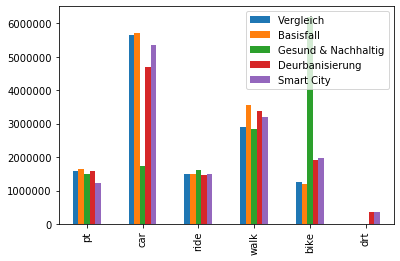

In [22]:
# plot absolute
modalShare.plot.bar()

      Vergleich  Basisfall  Gesund & Nachhaltig  Deurbanisierung  Smart City
pt     0.122070   0.121214             0.108032         0.117649    0.090894
car    0.439852   0.421022             0.124611         0.351485    0.394226
ride   0.115564   0.109116             0.116998         0.109193    0.109123
walk   0.225790   0.261157             0.204421         0.251592    0.234735
bike   0.096724   0.087492             0.445937         0.143175    0.145654
drt         NaN        NaN                  NaN         0.026906    0.025369


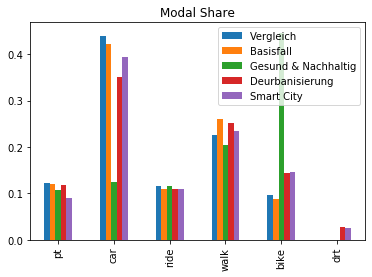

In [24]:
# copy the scenario names
columns = args.names.copy()
columns.insert(0, expected)

# create a data frame with relative values and plot it
relative = getRelative(modalShare, columns)
print(relative)
relative.plot.bar(title='Modal Share')

